# Company Introduction
Your client for this project is a multinational technology company.

**ECorp** is an American multinational technology company that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence.
They are spread across the globe with hundreds of thousands of employees in these domains.
When an employee at any company starts working, they first need to obtain the resource access necessary to fulfill their role.
Employees passing certain criteria regarding their primary and secondary roles are granted access to the requested resources.
This efficient system has helped the company maintain background checks of its employees and usage of allocated resources.

# Current Scenario
A group of employees has been invited to test the automated system. An auto-access model seeks to minimize the human involvement required to grant or revoke employee access.

The current process suffers from the following problems:

If an employee discovers that they need access to certain resources, they are supposed to contact a knowledgeable supervisor.
The supervisor takes time to manually grant the needed access to the requesting employee.
As employees move throughout a company, this access discovery/recovery cycle wastes a non-trivial amount of time and money.

The company has hired you as a data science consultant. They want to automate the process of approving or revoking access to a resource according to their role in the company.

## Your Role
You are given a dataset containing the ACTION (ground truth), RESOURCE, and information about the employee's role at the time of approval.
The model will take an employee's role information and the requested resource in the form of a resource code and will determine if an employee should be given access or not.
Your task is to build a binary-class classification model using the dataset.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

## Project Deliverables
Deliverable: Employee Access Classification.
Machine Learning Task: **Classification**
Target Variable: **ACTION**
Win Condition: N/A (best possible model)

## Evaluation Metric
The model evaluation will be based on the **Accuracy Score**

The dataset contains all the necessary information about an Employee like their ID and roles in the company, their Manager’s ID, RESOURCE id, and the ACTION.

The data consists of real historical data collected from 2010 & 2011. Employees are manually allowed or denied access to resources over time.

This is the data that we have to predict for future samples.


The dataset is divided into two parts: Train, and Test sets.

## Train Set:
The train set contains **24576 rows and 11columns.**
The last column ACTION is the target variable.

## Test Set:
The test set contains **8193 rows and 10 columns.**
The test set doesn’t contain the ACTION column.
It needs to be predicted for the test set.

## Dataset Feature Description

|Id|Feature|Description|
|:--|:--|:--|
|01|RESOURCE| An ID for each resource.|
|02|MGR_ID|The EMPLOYEE ID of the manager of the current EMPLOYEE ID record; an employee may have only one manager at a time.|
|03|ROLE_ROLLUP_1| Company role grouping category id 1 (e.g. US Engineering).|
|04|ROLE_ROLLUP_2| Company role grouping category id 2 (e.g. US Retail).|
|05|ROLE_DEPTNAME| Company role department description (e.g. Retail).|
|06|ROLE_TITLE| Company role business title description (e.g. Senior Engineering Retail Manager)|
|07|ROLE_FAMILY_DESC| Company role family extended description (e.g. Retail Manager, Software Engineering) |
|08|ROLE_FAMILY| Company role family description (e.g. Retail Manager).|
|09|ROLE_CODE| Company role code; this code is unique to each role (e.g. Manager)|
|10|ID| ID of the Employee|
|11|ACTION| ACTION is 1 if the resource was approved, 0 if the resource was no.|


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

# Knowing the Dataset

In [2]:
data = pd.read_csv(r'C:\Users\Mugdha\Music\GCDAI_9th May 2021\Employer access prediction/ea_train.csv') 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24576 entries, 0 to 24575
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          24576 non-null  int64
 1   MGR_ID            24576 non-null  int64
 2   ROLE_ROLLUP_1     24576 non-null  int64
 3   ROLE_ROLLUP_2     24576 non-null  int64
 4   ROLE_DEPTNAME     24576 non-null  int64
 5   ROLE_TITLE        24576 non-null  int64
 6   ROLE_FAMILY_DESC  24576 non-null  int64
 7   ROLE_FAMILY       24576 non-null  int64
 8   ROLE_CODE         24576 non-null  int64
 9   ID                24576 non-null  int64
 10  ACTION            24576 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [4]:
print('Shape of the given dataset: ', data.shape)
data.head()

Shape of the given dataset:  (24576, 11)


,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
0,75078,255037,118315,118316,118202,118784,262095,290919,118786,2270,1
1,79323,3120,117961,118300,120312,120313,120314,118424,120315,696,1
2,34958,8243,118555,118178,118320,117905,117906,290919,117908,13514,1
3,39371,7520,117961,118343,124725,117905,240983,290919,117908,13400,1
4,39330,17290,117961,118386,118522,117905,117906,290919,117908,6703,1


In [5]:
data.describe()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
count,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000
mean,42881.130371,25893.693278,116955.370443,118260.892741,118854.659098,125661.492594,169860.284505,183598.044556,119765.312378,16367.649292,0.941895
std,34262.362668,35746.796709,10950.867471,4841.345712,18639.574571,30491.343035,69329.221486,100563.091506,5559.507074,9464.173852,0.233948
min,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000,0.000000,0.000000
25%,20299.000000,4564.000000,117961.000000,118102.000000,118391.000000,118274.000000,117906.000000,118363.000000,118209.000000,8149.750000,1.000000
50%,35210.000000,13441.000000,117961.000000,118300.000000,118910.000000,118568.000000,128628.000000,119095.000000,118570.000000,16403.500000,1.000000
75%,74189.250000,41786.000000,117961.000000,118386.000000,120428.000000,120006.000000,233714.000000,290919.000000,119353.000000,24524.250000,1.000000
max,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000,32768.000000,1.000000


In [6]:
data.isnull().sum()                        # Checking missing values

RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
ID                  0
ACTION              0
dtype: int64

In [7]:
print('Duplicated values in the trained dataset: ', data.duplicated().any())      # Check Duplicated values

Duplicated values in the trained dataset:  False


<AxesSubplot:>

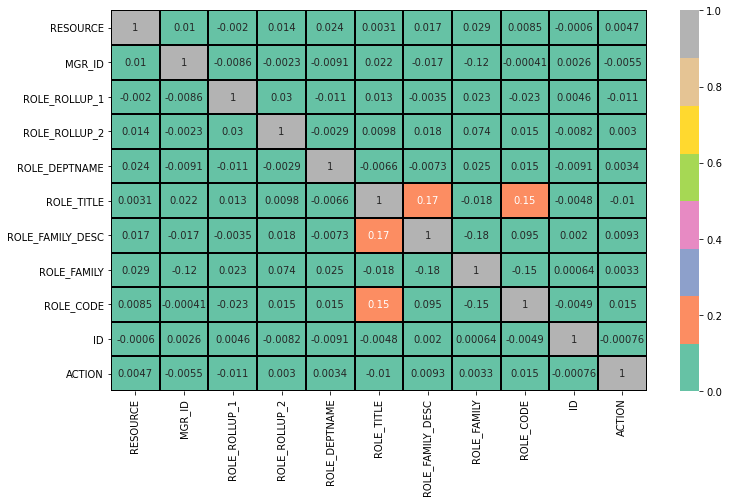

In [8]:
data.corr()

figure = plt.figure(figsize = (12,7))
sns.heatmap(data = data.corr(), annot = True, cmap = 'Set2',vmin = 0, vmax = 1,linecolor = 'black',linewidths = 1)

<AxesSubplot:xlabel='ACTION', ylabel='Density'>

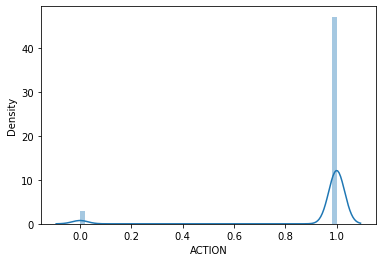

In [9]:
sns.distplot(data['ACTION'], kde = True)

In [10]:
data['ROLE_FAMILY'].mode()

0    290919
dtype: int64

In [11]:
data['ROLE_DEPTNAME'].nunique()

440

<AxesSubplot:xlabel='ACTION', ylabel='count'>

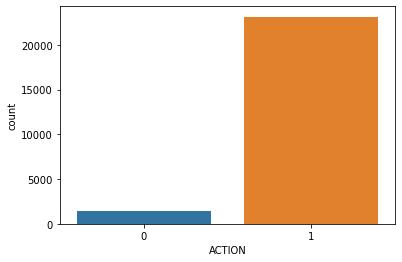

In [12]:
sns.countplot(data['ACTION'])

In [13]:
data_features = data.drop(['ACTION'], axis = 1)
data_target = data['ACTION']

In [14]:
print('Shape of Train data_features: ',data_features.shape)
print('Shape of Train data_target: ',data_target.shape)

Shape of Train data_features:  (24576, 10)
Shape of Train data_target:  (24576,)


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, test_size = 0.2, random_state = 4)

In [17]:
print('Shape of x train: ', X_train.shape)
print('Shape of x test: ', X_test.shape)
print('Shape of y train: ', y_train.shape)
print('Shape of y test: ', y_test.shape)

Shape of x train:  (19660, 10)
Shape of x test:  (4916, 10)
Shape of y train:  (19660,)
Shape of y test:  (4916,)


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
data_features.columns

Index(['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE', 'ID'],
      dtype='object')

In [20]:
numeric_features = X_train[['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']].columns
numeric_features

Index(['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE'],
      dtype='object')

In [21]:
X_train[numeric_features] = sc.fit_transform(X_train[numeric_features])

In [22]:
X_test[numeric_features] = sc.transform(X_test[numeric_features])

In [23]:
X_train.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID
7077,-0.515146,-0.582837,0.092529,0.003595,-0.023106,-0.186777,2.025845,-0.648179,0.039446,3459
24422,-0.646614,0.835047,0.088496,-0.027923,0.681834,0.076471,-0.445311,-0.640613,1.456288,5892
7919,-0.777733,-0.717975,0.092529,0.027338,0.077405,-0.241627,-0.285673,1.068967,-0.255941,23772
13813,-0.616822,0.926970,0.092529,0.009268,-0.026628,-0.226556,-0.752642,1.068967,-0.174648,23750
13275,-0.748347,-0.005908,0.092529,0.012629,0.073252,-0.186777,-0.585162,-0.648179,0.039446,2317


In [24]:
X_test.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID
8705,-0.406102,-0.585388,0.092529,0.012629,0.064578,-0.069297,-0.525575,-0.648179,0.671743,11668
1983,-0.131767,0.900907,0.112608,-18.337308,-0.053280,-0.255820,-0.752541,-0.653524,-0.331977,11291
18923,-1.047282,-0.005880,0.092529,0.012629,0.073252,-0.170794,0.929018,-0.648179,0.125470,4138
12197,-0.289197,-0.147969,0.084910,-0.085284,-0.053595,-0.256015,-0.753031,-1.630743,-0.333379,9781
22869,1.061535,-0.256202,0.092529,0.003595,-0.015799,-0.220175,1.889677,-0.649463,-0.140309,17216


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC
from xgboost import XGBClassifier

In [26]:
lr= LogisticRegression()
d_tree = DecisionTreeClassifier(max_leaf_nodes=10, max_features= "sqrt", max_depth=12, min_samples_split=5, min_samples_leaf=4)
rfc= RandomForestClassifier(n_estimators = 20, random_state = 4)
knn = KNeighborsClassifier(n_neighbors = 3)
svc = SVC(random_state=101)
xgb = XGBClassifier(random_state=101)
ab = AdaBoostClassifier(n_estimators=50, random_state=101)
gb = GradientBoostingClassifier(random_state=101)

In [27]:
print('Logistic Regression: ', lr.fit(X_train, y_train))
print('Decision Tree: ', d_tree.fit(X_train, y_train))
print('Random Forest: ', rfc.fit(X_train, y_train))
print('KNN: ', knn.fit(X_train, y_train))
print('SVC: ', svc.fit(X_train, y_train))
print('XGB: ', xgb.fit(X_train, y_train))
print('AdaB: ', ab.fit(X_train, y_train))
print('GB: ', gb.fit(X_train, y_train))

Logistic Regression:  LogisticRegression()
Decision Tree:  DecisionTreeClassifier(max_depth=12, max_features='sqrt', max_leaf_nodes=10,
                       min_samples_leaf=4, min_samples_split=5)
Random Forest:  RandomForestClassifier(n_estimators=20, random_state=4)
KNN:  KNeighborsClassifier(n_neighbors=3)
SVC:  SVC(random_state=101)
[15:27:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, mis

In [28]:
pred_lr = lr.predict(X_train)
pred_dt = d_tree.predict(X_train)
pred_rf = rfc.predict(X_train)
pred_knn = knn.predict(X_train)
pred_svc = svc.predict(X_train)
pred_xgb = xgb.predict(X_train)
pred_ab = ab.predict(X_train)
pred_gb = gb.predict(X_train)

In [29]:
pred_lr_test = lr.predict(X_test)
pred_dt_test = d_tree.predict(X_test)
pred_rf_test = rfc.predict(X_test)
pred_knn_test = knn.predict(X_test)
pred_svc_test = svc.predict(X_test)
pred_xgb_test = xgb.predict(X_test)
pred_ab_test = ab.predict(X_test)
pred_gb_test = gb.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [31]:
print('Logistic Regression:') # LR
print('Accuracy Score of trained set: ',accuracy_score(pred_lr, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_lr_test, y_test))
print()
print('Decision Tree:')  # DT
print('Accuracy Score of trained set: ',accuracy_score(pred_dt, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_dt_test, y_test))
print()
print('Random Forest:')   # RF
print('Accuracy Score of trained set: ',accuracy_score(pred_rf, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_rf_test, y_test))
print()
print('K-Nearest Neighbour:') # KNN
print('Accuracy Score of trained set: ',accuracy_score(pred_knn, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_knn_test, y_test))
print()
print('SVC:') #SVC
print('Accuracy Score of trained set: ',accuracy_score(pred_svc, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_svc_test, y_test))
print()
print('XG Booster:') #XGB
print('Accuracy Score of trained set: ',accuracy_score(pred_xgb, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_xgb_test, y_test))
print()
print('ADA Booster:') #AB
print('Accuracy Score of trained set: ',accuracy_score(pred_ab, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_ab_test, y_test))
print()
print('Gradient Booster:') #GB
print('Accuracy Score of trained set: ',accuracy_score(pred_gb, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_gb_test, y_test))


Logistic Regression:
Accuracy Score of trained set:  0.9428789420142422
Accuracy Score of test set:  0.9379576891781937

Decision Tree:
Accuracy Score of trained set:  0.9437436419125127
Accuracy Score of test set:  0.9383645240032547

Random Forest:
Accuracy Score of trained set:  0.9987283825025433
Accuracy Score of test set:  0.9442636289666395

K-Nearest Neighbour:
Accuracy Score of trained set:  0.9458799593082401
Accuracy Score of test set:  0.9312449145646867

SVC:
Accuracy Score of trained set:  0.9428789420142422
Accuracy Score of test set:  0.9379576891781937

XG Booster:
Accuracy Score of trained set:  0.9718718209562563
Accuracy Score of test set:  0.942432872253865

ADA Booster:
Accuracy Score of trained set:  0.9428789420142422
Accuracy Score of test set:  0.9379576891781937

Gradient Booster:
Accuracy Score of trained set:  0.944913530010173
Accuracy Score of test set:  0.9383645240032547


In [32]:
print('Logistic Regression:')
print(classification_report(pred_lr_test, y_test))
print()
print('Decision Tree:')
print(classification_report(pred_dt_test, y_test))
print()
print('Random Forest:')
print(classification_report(pred_rf_test, y_test))
print()
print('K-Nearest Neighbour:')
print(classification_report(pred_knn_test, y_test))
print()
print('SVC:')
print(classification_report(pred_svc_test, y_test))
print()
print('XGB:')
print(classification_report(pred_xgb_test, y_test))
print()
print('ADA Booster:')
print(classification_report(pred_ab_test, y_test))
print()
print('Gradient Booster:')
print(classification_report(pred_gb_test, y_test))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97      4916

    accuracy                           0.94      4916
   macro avg       0.50      0.47      0.48      4916
weighted avg       1.00      0.94      0.97      4916


Decision Tree:
              precision    recall  f1-score   support

           0       0.01      0.75      0.02         4
           1       1.00      0.94      0.97      4912

    accuracy                           0.94      4916
   macro avg       0.50      0.84      0.49      4916
weighted avg       1.00      0.94      0.97      4916


Random Forest:
              precision    recall  f1-score   support

           0       0.27      0.62      0.37       131
           1       0.99      0.95      0.97      4785

    accuracy                           0.94      4916
   macro avg       0.63      0.79      0.67      4916
weighted avg       0.

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
def evulate_model(model, X, y):
    cv = cross_val_score(model, X, y, cv = 5)
    print(cv)
    print(cv.mean())

In [35]:
print("Logistic regression")
evulate_model(lr, X_train, y_train)
print()
print("DECISION TREE")
evulate_model(d_tree, X_train, y_train)
print()
print("Random forest classifier")
evulate_model(rfc, X_train, y_train)
print()
print("K-Nearest Neighbour")
evulate_model(knn, X_train, y_train)
print()
print("Support Vector Classifier")
evulate_model(svc, X_train, y_train)
print()
print("XG Booster Classifier")
evulate_model(xgb, X_train, y_train)
print()
print("ADA Booster Classifier")
evulate_model(ab, X_train, y_train)
print()
print("Gradient Boosting Classifier")
evulate_model(gb, X_train, y_train)

Logistic regression
[0.94303154 0.94303154 0.94277721 0.94277721 0.94277721]
0.9428789420142423

DECISION TREE
[0.94277721 0.94277721 0.94277721 0.94277721 0.94201424]
0.9426246185147507

Random forest classifier
[0.94532045 0.94938962 0.94582909 0.94633774 0.9448118 ]
0.9463377416073246

K-Nearest Neighbour
[0.93641913 0.93438454 0.93489318 0.9361648  0.93769074]
0.935910478128179

Support Vector Classifier
[0.94303154 0.94303154 0.94277721 0.94277721 0.94277721]
0.9428789420142423

XG Booster Classifier
[15:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

In [37]:
from sklearn.model_selection import GridSearchCV 
grid = {        'n_estimators': [10, 20, 40, 60, 100, 150, 200],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [2,3,5,10,20],
                'bootstrap': [True, False]
                }
rf_clf = RandomForestClassifier()
rf_random = GridSearchCV(estimator = rf_clf, param_grid = grid, cv = 3, verbose=1, n_jobs = -1)
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed: 20.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 20, 40, 60, 100, 150, 200]},
             verbose=1)

In [38]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=250, learning_rate = learning_rate, max_features=2, max_depth = 3, random_state = 7)
    gb.fit(X_train, y_train)

In [39]:
rf_random.score(X_train, y_train)

0.9932858596134283

In [40]:
gb.score(X_train, y_train)

0.9675483214649033

# Working on Test dataset

In [41]:
test_data = pd.read_csv(r'C:\Users\Mugdha\Music\GCDAI_9th May 2021\Employer access prediction\ea_test.csv')

In [42]:
print('Shape of the Test dataset: ', test_data.shape)
test_data

Shape of the Test dataset:  (8193, 10)


,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID
0,37793,81744,117902,117903,118783,118451,130134,118453,118454,18245
1,40309,1541,117961,118225,123173,119093,123174,119095,119096,9226
2,27356,205,117961,118386,118746,118784,147114,290919,118786,27195
3,5173,8229,117961,118300,121305,119351,149246,3130,119353,6478
4,77207,51791,117961,119256,120943,118995,280788,292795,118997,4813
...,...,...,...,...,...,...,...,...,...,...
8188,80316,15625,118169,118170,119796,119849,310589,118638,119851,29155
8189,36480,2930,117961,118343,118700,120690,136365,290919,120692,6717
8190,74627,13193,118349,118350,117895,118194,118195,117887,118196,15730
8191,51803,13836,119920,119921,142145,128230,302830,4673,128231,24068


In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          8193 non-null   int64
 1   MGR_ID            8193 non-null   int64
 2   ROLE_ROLLUP_1     8193 non-null   int64
 3   ROLE_ROLLUP_2     8193 non-null   int64
 4   ROLE_DEPTNAME     8193 non-null   int64
 5   ROLE_TITLE        8193 non-null   int64
 6   ROLE_FAMILY_DESC  8193 non-null   int64
 7   ROLE_FAMILY       8193 non-null   int64
 8   ROLE_CODE         8193 non-null   int64
 9   ID                8193 non-null   int64
dtypes: int64(10)
memory usage: 640.2 KB


In [44]:
test_data.isnull().sum()

RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
ID                  0
dtype: int64

In [45]:
print('Duplicated values in the test dataset: ', test_data.duplicated().any())

Duplicated values in the test dataset:  False


In [46]:
test_data.columns

Index(['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE', 'ID'],
      dtype='object')

# Scaling Test dataset

In [47]:
test_data[numeric_features]= sc.fit_transform(test_data[numeric_features])
test_data.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID
0,-0.155109,1.521175,0.089945,-0.147335,-0.015287,-0.252386,-0.585370,-0.653942,-0.219593,18245
1,-0.080906,-0.678291,0.095487,-0.056380,0.205380,-0.232695,-0.684743,-0.647539,-0.119450,9226
2,-0.462923,-0.714929,0.095487,-0.010903,-0.017147,-0.242172,-0.342932,1.066187,-0.167806,27195
3,-1.117158,-0.494881,0.095487,-0.035195,0.111484,-0.224782,-0.312492,-1.804143,-0.079362,6478
4,1.007312,0.699752,0.095487,0.234844,0.093287,-0.235701,1.565643,1.084898,-0.134893,4813


# Prediction of ACTION

In [48]:
pred_data = rf_random.predict(test_data)

In [49]:
pred_data

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [50]:
test_final = pd.DataFrame(pred_data)

In [51]:
test_final

,0
0,1
1,1
2,1
3,1
4,1
...,...
8188,1
8189,1
8190,1
8191,1


In [53]:
data_submission = test_data['ID']

# Preparing Submission File

In [54]:
submission_file = pd.concat([data_submission,test_final], axis = 1)

In [55]:
submission_file

,ID,0
0,18245,1
1,9226,1
2,27195,1
3,6478,1
4,4813,1
...,...,...
8188,29155,1
8189,6717,1
8190,15730,1
8191,24068,1


# Saving results in csv file

In [56]:
submission_file.to_csv('Employer_Access.csv', header=False, index=False)